In [214]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)

# Read data

df = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\Cancer_Data.csv', sep=';')

In [215]:
# Let's take a look at the data

df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

In [216]:
# Important information about the data

df.drop ('id', axis = 1).describe().drop('count', axis =0)

radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
mean    14.127292     19.289649       91.969033   654.889104         0.096360   
std      3.524049      4.301036       24.298981   351.914129         0.014064   
min      6.981000      9.710000       43.790000   143.500000         0.052630   
25%     11.700000     16.170000       75.170000   420.300000         0.086370   
50%     13.370000     18.840000       86.240000   551.100000         0.095870   
75%     15.780000     21.800000      104.100000   782.700000         0.105300   
max     28.110000     39.280000      188.500000  2501.000000         0.163400   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
mean          0.104341        0.088799             0.048919       0.181162   
std           0.052813        0.079720             0.038803       0.027414   
min           0.019380        0.000000             0.000000       0.106000   
25%           0.064920        0.029560             0.020310       0.161900   
50%           0.092630        0.061540             0.033500       0.179200   
75%           0.130400        0.130700             0.074000       0.195700   
max           0.345400        0.426800             0.201200       0.304000   

      fractal_dimension_mean  radius_se  texture_se  perimeter_se     area_se  \
mean                0.062798   0.405172    1.216853      2.866059   40.337079   
std                 0.007060   0.277313    0.551648      2.021855   45.491006   
min                 0.049960   0.111500    0.360200      0.757000    6.802000   
25%                 0.057700   0.232400    0.833900      1.606000   17.850000   
50%                 0.061540   0.324200    1.108000      2.287000   24.530000   
75%                 0.066120   0.478900    1.474000      3.357000   45.190000   
max                 0.097440   2.873000    4.885000     21.980000  542.200000   

      smoothness_se  compactness_se  concavity_se  concave points_se  \
mean       0.007041        0.025478      0.031894           0.011796   
std        0.003003        0.017908      0.030186           0.006170   
min        0.001713        0.002252      0.000000           0.000000   
25%        0.005169        0.013080      0.015090           0.007638   
50%        0.006380        0.020450      0.025890           0.010930   
75%        0.008146        0.032450      0.042050           0.014710   
max        0.031130        0.135400      0.396000           0.052790   

      symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
mean     0.020542              0.003795     16.269190      25.677223   
std      0.008266              0.002646      4.833242       6.146258   
min      0.007882              0.000895      7.930000      12.020000   
25%      0.015160              0.002248     13.010000      21.080000   
50%      0.018730              0.003187     14.970000      25.410000   
75%      0.023480              0.004558     18.790000      29.720000   
max      0.078950              0.029840     36.040000      49.540000   

      perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
mean       107.261213   880.583128          0.132369           0.254265   
std         33.602542   569.356993          0.022832           0.157336   
min         50.410000   185.200000          0.071170           0.027290   
25%         84.110000   515.300000          0.116600           0.147200   
50%         97.660000   686.500000          0.131300           0.211900   
75%        125.400000  1084.000000          0.146000           0.339100   
max        251.200000  4254.000000          0.222600           1.058000   

      concavity_worst  concave points_worst  symmetry_worst  \
mean         0.272188              0.114606        0.290076   
std          0.208624              0.065732        0.061867   
min          0.000000              0.000000        0.156500   
25%          0.114500              0.064930        0.250400   
50%          

In [217]:
# DATA CLEANING:
# Let's see if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
    
# 0% of missing data in every column 

id - 0%
diagnosis - 0%
radius_mean - 0%
texture_mean - 0%
perimeter_mean - 0%
area_mean - 0%
smoothness_mean - 0%
compactness_mean - 0%
concavity_mean - 0%
concave points_mean - 0%
symmetry_mean - 0%
fractal_dimension_mean - 0%
radius_se - 0%
texture_se - 0%
perimeter_se - 0%
area_se - 0%
smoothness_se - 0%
compactness_se - 0%
concavity_se - 0%
concave points_se - 0%
symmetry_se - 0%
fractal_dimension_se - 0%
radius_worst - 0%
texture_worst - 0%
perimeter_worst - 0%
area_worst - 0%
smoothness_worst - 0%
compactness_worst - 0%
concavity_worst - 0%
concave points_worst - 0%
symmetry_worst - 0%
fractal_dimension_worst - 0%


In [218]:
# Data types for columns
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: >

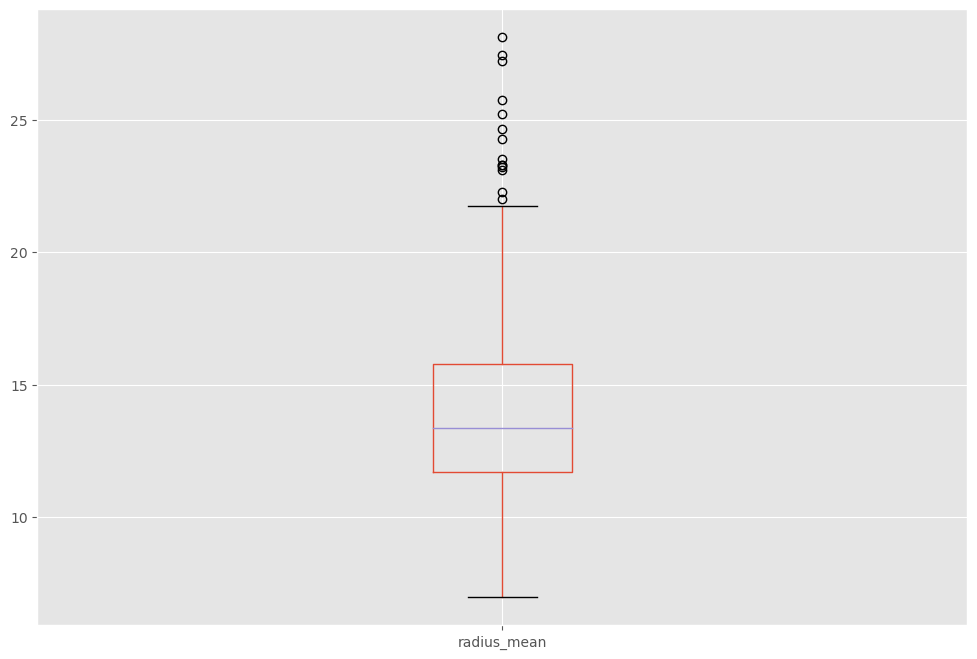

In [219]:
# Now let's check if there are any Outliers on some important data
df.boxplot(column = ['radius_mean'])

<Axes: >

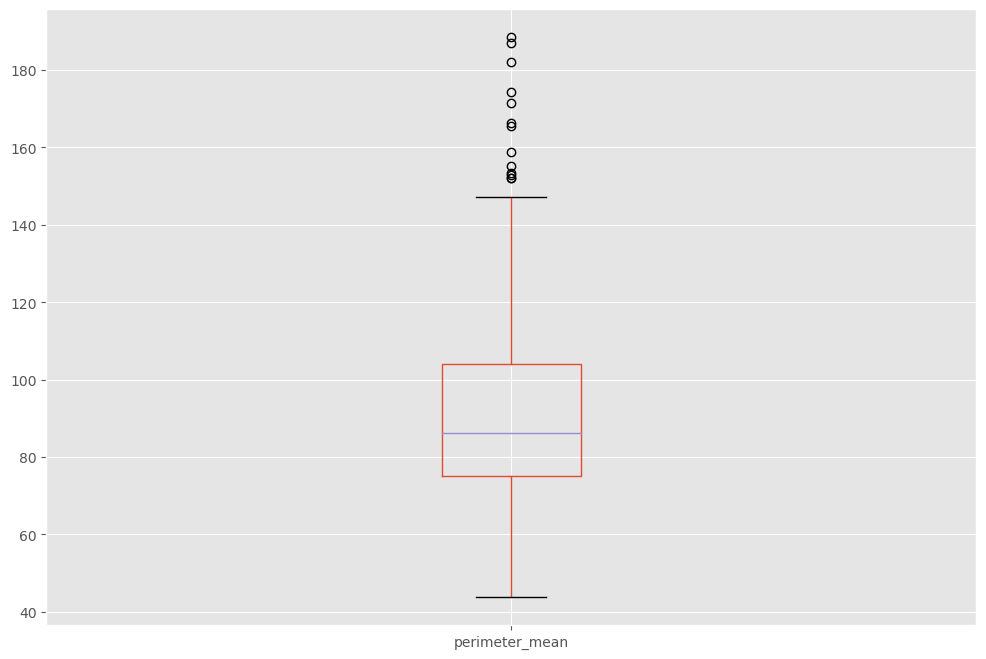

In [220]:
df.boxplot(column = ['perimeter_mean'])

In [221]:
# Is there duplicate data?
df.drop_duplicates()

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

In [222]:
# In order to verify if the column of diagnosis have only two values (M or B)
# first we must "numerize" that column

df_numerized = df

df_numerized['diagnosis'] = df_numerized['diagnosis'].astype('category')
df_numerized['diagnosis'] = df_numerized['diagnosis'].cat.codes

df_numerized

# So in this case "1" means "M (Malignant cancer)" and "0" means "B (Benign cancer)"

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302          1       17.990         10.38          122.80   
1       842517          1       20.570         17.77          132.90   
2     84300903          1       19.690         21.25          130.00   
3     84348301          1       11.420         20.38           77.58   
4     84358402          1       20.290         14.34          135.10   
5       843786          1       12.450         15.70           82.57   
6       844359          1       18.250         19.98          119.60   
7     84458202          1       13.710         20.83           90.20   
8       844981          1       13.000         21.82           87.50   
9     84501001          1       12.460         24.04           83.97   
10      845636          1       16.020         23.24          102.70   
11    84610002          1       15.780         17.89          103.60   
12      846226          1       19.170         24.80          132.40   
13      846381          1       15.850         23.95          103.70   
14    84667401          1       13.730         22.61           93.60   
15    84799002          1       14.540         27.54           96.73   
16      848406          1       14.680         20.13           94.74   
17    84862001          1       16.130         20.68          108.10   
18      849014          1       19.810         22.15          130.00   
19     8510426          0       13.540         14.36           87.46   
20     8510653          0       13.080         15.71           85.63   
21     8510824          0        9.504         12.44           60.34   
22     8511133          1       15.340         14.26          102.50   
23      851509          1       21.160         23.04          137.20   
24      852552          1       16.650         21.38          110.00   
25      852631          1       17.140         16.40          116.00   
26      852763          1       14.580         21.53           97.41   
27      852781          1       18.610         20.25          122.10   
28      852973          1       15.300         25.27          102.40   
29      853201          1       17.570         15.05          115.00   
30      853401          1       18.630         25.11          124.80   
31      853612          1       11.840         18.70           77.93   
32    85382601          1       17.020         23.98          112.80   
33      854002          1       19.270         26.47          127.90   
34      854039          1       16.130         17.88          107.00   
35      854253          1       16.740         21.59          110.10   
36      854268          1       14.250         21.72           93.63   
37      854941          0       13.030         18.42           82.61   
38      855133          1       14.990         25.20           95.54   
39      855138          1       13.480         20.82           88.40   
40      855167          1       13.440         21.58           86.18   
41      855563          1       10.950         21.35           71.90   
42      855625          1       19.070         24.81          128.30   
43      856106          1       13.280         20.28           87.32   
44    85638502          1       13.170         21.81           85.42   
45      857010          1       18.650         17.60          123.70   
46    85713702          0        8.196         16.84           51.71   
47       85715          1       13.170         18.66           85.98   
48      857155          0       12.050         14.63           78.04   
49      857156          0       13.490         22.30           86.91   
50      857343          0       11.760         21.60           74.72   
51      857373          0       13.640         16.34           87.21   
52      857374          0       11.940         18.24           75.71   
53      857392          1       18.220         18.70          120.30   
54      857438          1       15.100         22.02

In [223]:
# Cheking that the only to possible values on the diagnosis are 1 or 0
error = 0

for row in df['diagnosis']:
    if (row != 1 and row != 0): error += 1
        
error

0

In [224]:
# Sorting the data by its diagnosis
df_numerized.sort_values(by = ['diagnosis'], inplace = False, ascending = False)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302          1       17.990         10.38          122.80   
210  881046502          1       20.580         22.14          134.70   
190     874858          1       14.220         23.12           94.37   
193     875263          1       12.340         26.86           81.15   
194   87556202          1       14.860         23.21          100.40   
196     875938          1       13.770         22.29           90.63   
197     877159          1       18.080         21.84          117.40   
198     877486          1       19.180         22.49          127.50   
199     877500          1       14.450         20.22           94.49   
201     877989          1       17.540         19.32          115.10   
202     878796          1       23.290         26.67          158.90   
203      87880          1       13.810         23.75           91.56   
205     879523          1       15.120         16.68           98.78   
207     879830          1       17.010         20.26          109.70   
468    9113538          1       17.600         23.33          119.00   
212    8810703          1       28.110         18.47          188.50   
184     873885          1       15.280         22.41           98.92   
213  881094802          1       17.420         25.56          114.50   
214    8810955          1       14.190         23.81           92.87   
215    8810987          1       13.860         16.93           90.96   
218    8811842          1       19.800         21.56          129.70   
219   88119002          1       19.530         32.47          128.00   
461  911296202          1       27.420         26.27          186.90   
223    8812877          1       15.750         20.25          102.60   
460  911296201          1       17.080         27.15          111.20   
229     881861          1       12.830         22.33           85.26   
230     881972          1       17.050         19.08          113.40   
233   88206102          1       20.510         27.81          134.40   
236   88299702          1       23.210         26.97          153.50   
237     883263          1       20.480         21.46          132.50   
186     874217          1       18.310         18.58          118.60   
479     911916          1       16.250         19.51          109.80   
127     866203          1       19.000         18.91          123.40   
498     914769          1       18.490         17.52          121.30   
129     866674          1       19.790         25.12          130.40   
131       8670          1       15.460         19.48          101.70   
132   86730502          1       16.160         21.54          106.20   
512     915691          1       13.400         20.52           88.64   
134     867739          1       18.450         21.91          120.20   
135     868202          1       12.770         22.47           81.72   
138     868826          1       14.950         17.57           96.85   
509     915460          1       15.460         23.95          103.80   
141     869104          1       16.110         18.05          105.10   
146     869691          1       11.800         16.58           78.99   
503     915143          1       23.090         19.83          152.10   
501      91504          1       13.820         24.49           92.33   
499      91485          1       20.590         21.24          137.80   
156    8711202          1       17.680         20.74          117.40   
365     901088          1       20.440         21.78          133.80   
492     914062          1       18.010         20.56          118.40   
161    8711803          1       19.190         15.94          126.30   
162     871201          1       19.590         18.15          130.70   
164    8712289          1       23.270         22.04          152.10   
489     913535          1       16.690         20.20          107.10   
167    8712729          1       16.780         18.80

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

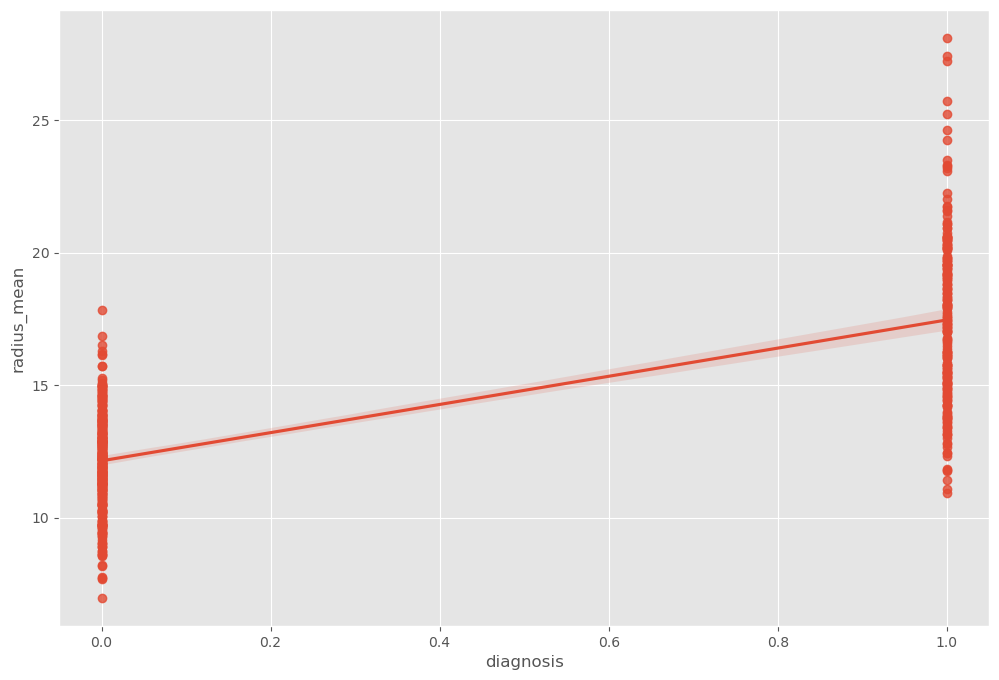

In [225]:
# CORRELATION DATA:

# Let's check that radius and perimeter of the cancer is related to its diagnosis as we could forecast.

sns.regplot(x = 'diagnosis', y = 'radius_mean', data = df_numerized )

In [226]:
# As we saw in the last picture, the more radius mean of the cancer the more likely it is to turn out Malignant cancer


<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

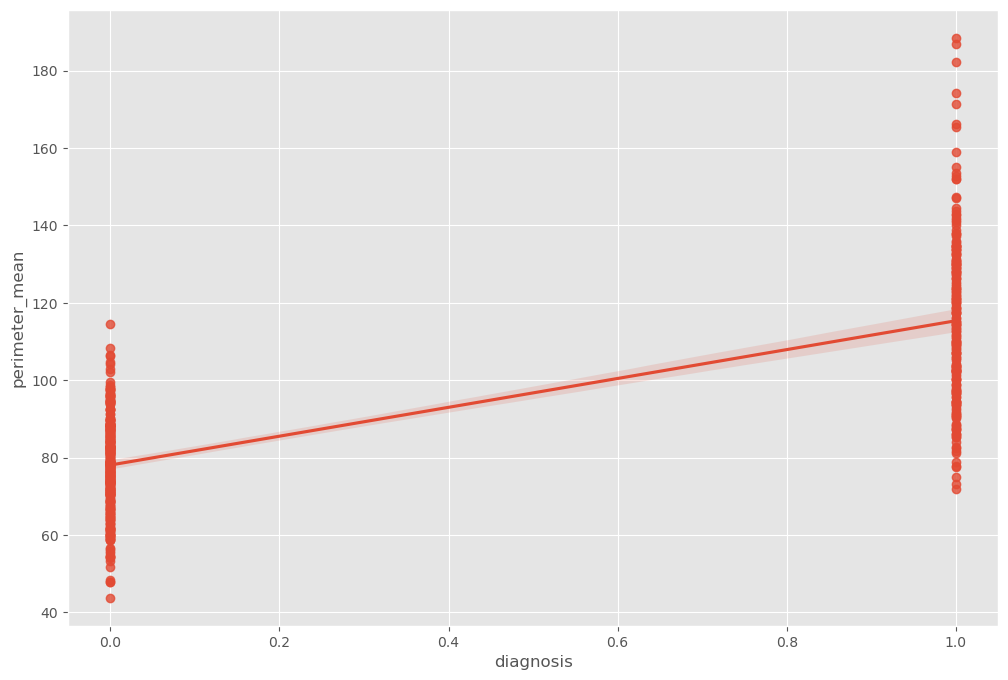

In [227]:
sns.regplot(x = 'diagnosis', y = 'perimeter_mean', data = df_numerized )

In [228]:
# Same happends with perimeter mean

In [229]:
# Correlation Matrix between all columns acording to three different methods:
# PEARSON

df_numerized.corr(method = 'pearson') 

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

In [230]:
# KENDALL
df_numerized.corr(method = 'kendall')

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000  -0.065268     0.029641      0.082348   
diagnosis               -0.065268   1.000000     0.599082      0.377644   
radius_mean              0.029641   0.599082     1.000000      0.229159   
texture_mean             0.082348   0.377644     0.229159      1.000000   
perimeter_mean           0.029287   0.611775     0.963320      0.234353   
area_mean                0.028958   0.599992     0.985565      0.230829   
smoothness_mean         -0.049773   0.304033     0.099549      0.017135   
compactness_mean        -0.001027   0.497971     0.340020      0.184220   
concavity_mean           0.001257   0.599449     0.465087      0.236079   
concave points_mean     -0.002451   0.635873     0.566917      0.209629   
symmetry_mean            0.000223   0.271924     0.081502      0.075493   
fractal_dimension_mean  -0.058586  -0.021173    -0.246220     -0.039255   
radius_se               -0.011542   0.504197     0.384712      0.247098   
texture_se               0.019942   0.015872    -0.095861      0.309294   
perimeter_se             0.001034   0.515243     0.398999      0.264142   
area_se                  0.002804   0.583722     0.549079      0.270659   
smoothness_se            0.012489  -0.042656    -0.226065      0.024484   
compactness_se           0.025455   0.311115     0.181153      0.180535   
concavity_se             0.018670   0.384486     0.255945      0.197820   
concave points_se        0.010642   0.399546     0.286742      0.162570   
symmetry_se             -0.019548  -0.075451    -0.168407      0.007114   
fractal_dimension_se    -0.013925   0.164674    -0.005832      0.099663   
radius_worst             0.019044   0.644195     0.882063      0.246993   
texture_worst            0.051211   0.389654     0.210302      0.741293   
perimeter_worst          0.019707   0.650879     0.862763      0.254406   
area_worst               0.017681   0.643117     0.882035      0.248096   
smoothness_worst        -0.054819   0.347952     0.082284      0.069336   
compactness_worst       -0.007514   0.495958     0.332970      0.199777   
concavity_worst         -0.007540   0.576907     0.421100      0.235242   
concave points_worst    -0.006402   0.639090     0.532569      0.217743   
symmetry_worst          -0.046924   0.324380     0.114141      0.081482   
fractal_dimension_worst -0.060670   0.254571     0.024103      0.078289   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.029287   0.028958        -0.049773   
diagnosis                      0.611775   0.599992         0.304033   
radius_mean                    0.963320   0.985565         0.099549   
texture_mean                   0.234353   0.230829         0.017135   
perimeter_mean                 1.000000   0.956965         0.122434   
area_mean                      0.956965   1.000000         0.092541   
smoothness_mean                0.122434   0.092541         1.000000   
compactness_mean               0.375540   0.333534         0.491072   
concavity_mean                 0.497587   0.461843         0.364105   
concave points_mean            0.596716   0.561760         0.398511   
symmetry_mean                  0.101781   0.076963         0.381515   
fractal_dimension_mean        -0.214661  -0.252131         0.417070   
radius_se                      0.393716   0.387101         0.223561   
texture_se                    -0.091170  -0.094179         0.061806   
perimeter_se                   0.414246   0.400951         0.220743   
area_se                        0.557127   0.552309         0.196414   
smoothness_se                 -0.215165  -0.226658         0.230123   
compactness_se                 0.211562   0.177378         0.274218   
concavity_se                   0.283680   0.254040         0.247024   
concave points_se              0.310856   0.283280         0.305479   
symmetry_se                   -0.158856  -0.169859         0.101

In [231]:
# SPEARMAN
df_numerized.corr(method = 'spearman')

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000  -0.079866     0.043740      0.125809   
diagnosis               -0.079866   1.000000     0.732785      0.461971   
radius_mean              0.043740   0.732785     1.000000      0.340956   
texture_mean             0.125809   0.461971     0.340956      1.000000   
perimeter_mean           0.043374   0.748496     0.997802      0.348142   
area_mean                0.042829   0.734122     0.999602      0.344145   
smoothness_mean         -0.073225   0.371892     0.148510      0.024649   
compactness_mean        -0.002247   0.609288     0.497578      0.266499   
concavity_mean           0.000657   0.733308     0.645728      0.342646   
concave points_mean     -0.003174   0.777877     0.759702      0.306891   
symmetry_mean           -0.001102   0.332567     0.120242      0.110130   
fractal_dimension_mean  -0.087017  -0.025903    -0.349931     -0.059303   
radius_se               -0.016157   0.616912     0.550247      0.363621   
texture_se               0.032837   0.019419    -0.144499      0.450720   
perimeter_se             0.002656   0.630411     0.565520      0.386813   
area_se                  0.002448   0.714184     0.738077      0.395139   
smoothness_se            0.020673  -0.052193    -0.326385      0.037048   
compactness_se           0.037236   0.380666     0.264904      0.263591   
concavity_se             0.029344   0.470338     0.364555      0.287188   
concave points_se        0.016625   0.488717     0.410576      0.238610   
symmetry_se             -0.028736  -0.092303    -0.241376      0.008945   
fractal_dimension_se    -0.020282   0.201492    -0.008411      0.147605   
radius_worst             0.025451   0.787933     0.978604      0.366547   
texture_worst            0.077484   0.476720     0.314911      0.909218   
perimeter_worst          0.026199   0.796319     0.971555      0.375273   
area_worst               0.023137   0.786902     0.978863      0.368335   
smoothness_worst        -0.080853   0.425513     0.125789      0.101401   
compactness_worst       -0.011300   0.606810     0.491357      0.290917   
concavity_worst         -0.013284   0.705734     0.596043      0.339725   
concave points_worst    -0.012798   0.781674     0.727265      0.319235   
symmetry_worst          -0.064977   0.396843     0.174698      0.120693   
fractal_dimension_worst -0.090637   0.311477     0.044564      0.116144   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.043374   0.042829        -0.073225   
diagnosis                      0.748496   0.734122         0.371892   
radius_mean                    0.997802   0.999602         0.148510   
texture_mean                   0.348142   0.344145         0.024649   
perimeter_mean                 1.000000   0.997068         0.182923   
area_mean                      0.997068   1.000000         0.138053   
smoothness_mean                0.182923   0.138053         1.000000   
compactness_mean               0.543925   0.488988         0.678806   
concavity_mean                 0.681958   0.642557         0.518511   
concave points_mean            0.788629   0.755165         0.565172   
symmetry_mean                  0.150049   0.113928         0.542228   
fractal_dimension_mean        -0.304891  -0.358425         0.588465   
radius_se                      0.560326   0.553388         0.334282   
texture_se                    -0.137578  -0.142469         0.091283   
perimeter_se                   0.582789   0.568237         0.331360   
area_se                        0.745824   0.741518         0.296059   
smoothness_se                 -0.311147  -0.327431         0.338692   
compactness_se                 0.308620   0.260362         0.392455   
concavity_se                   0.402277   0.362308         0.354730   
concave points_se              0.441996   0.406468         0.438826   
symmetry_se                   -0.228187  -0.243507         0.150

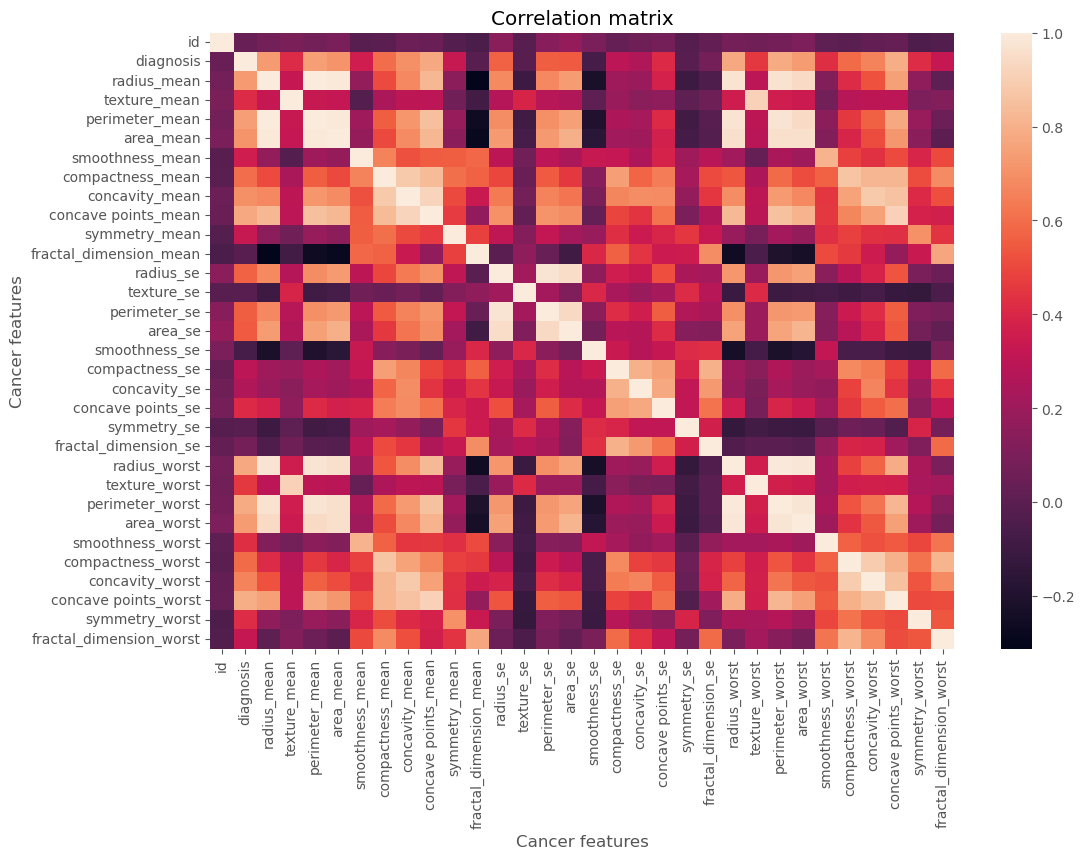

In [232]:
# In this project we will only use Pearson correlation.
# Let's see how the correlation matrix looks like

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix)

plt.title("Correlation matrix")

plt.xlabel("Cancer features")

plt.ylabel("Cancer features")

plt.show()

In [233]:
# The heat map shows that the values with most correlation to the diagnosis are:
# radius,perimeter, area, concavity, concave points means and its worst versions

# We note that we forecasted that radius and perimeter should have high correlation to the diagnosis, but we discover
# that there are more correlated data

In [234]:
# Let's take a further look in the numbers of highest correlated data 

correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind = "quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs)> 0.6]

print(strong_pairs)

concave points_se        concave points_worst       0.602450
concave points_worst     concave points_se          0.602450
compactness_mean         symmetry_mean              0.602641
symmetry_mean            compactness_mean           0.602641
concave points_se        fractal_dimension_se       0.611044
fractal_dimension_se     concave points_se          0.611044
symmetry_worst           compactness_worst          0.614441
compactness_worst        symmetry_worst             0.614441
concave points_se        concave points_mean        0.615634
concave points_mean      concave points_se          0.615634
area_se                  concavity_mean             0.617427
concavity_mean           area_se                    0.617427
fractal_dimension_worst  smoothness_worst           0.617624
smoothness_worst         fractal_dimension_worst    0.617624
perimeter_worst          concavity_worst            0.618344
concavity_worst          perimeter_worst            0.618344
concavity_mean          

In [235]:
# In particular, the highest correlation data to diagnosis are the following:

correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind = "quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs)> 0.6]['diagnosis']

print(strong_pairs)

concavity_worst         0.659610
concavity_mean          0.696360
area_mean               0.708984
radius_mean             0.730029
area_worst              0.733825
perimeter_mean          0.742636
radius_worst            0.776454
concave points_mean     0.776614
perimeter_worst         0.782914
concave points_worst    0.793566
diagnosis               1.000000
dtype: float64


C:\Users\franc\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


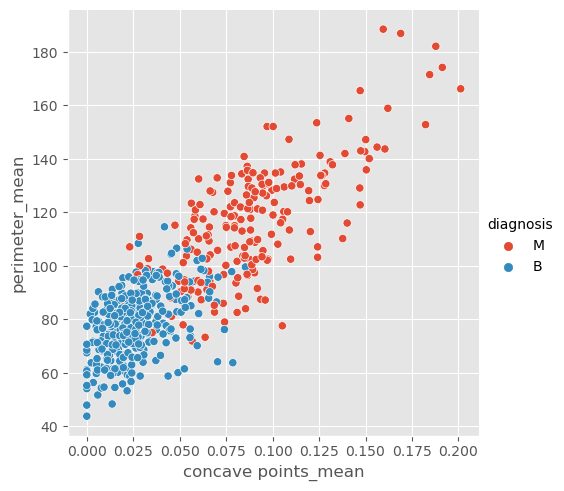

In [236]:
df = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\Cancer_Data.csv', sep=';')
sns.relplot(data=df, x="concave points_mean", y="perimeter_mean", hue="diagnosis")

In [237]:
# MACHINE LEARNING

# First, let's define dependent and independent variables

y = df['diagnosis'] # Dependent variable
X = df.drop(['id','diagnosis'],axis =1) # Independent variables

# Then, let's split the data into a training set and testing set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25)

In [238]:
# Fit a logistic regression model

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [239]:
# Prediction for the test data

y_pred = model.predict(X_test)

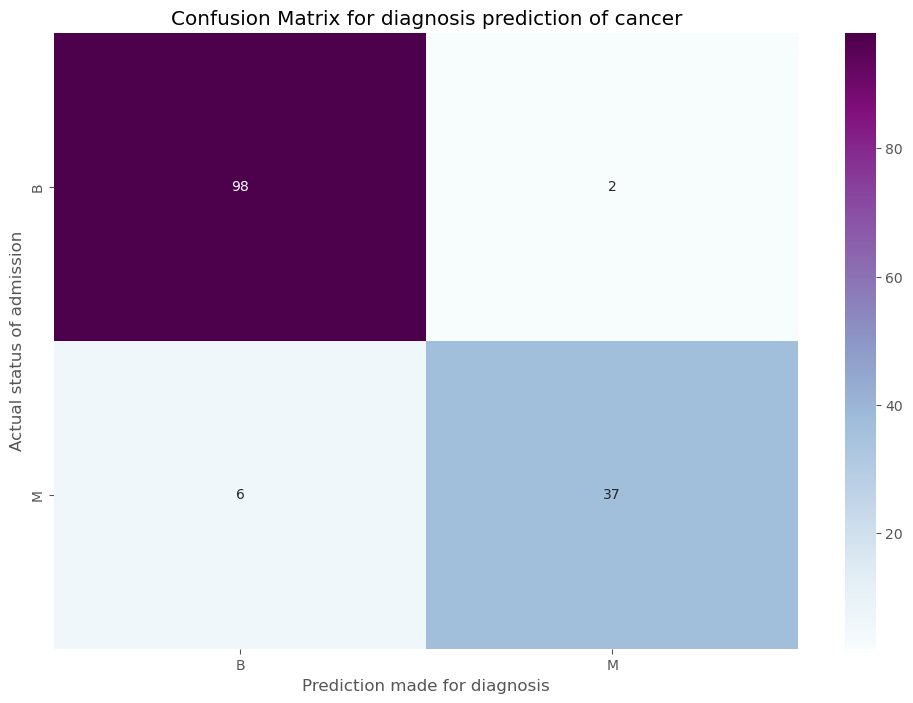

In [240]:
# Finally evaluate the model using a confusion matrix to obtain an accuracy rate

ConfusionMatrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(ConfusionMatrix, annot = True, cmap = 'BuPu')
ax.set_title('Confusion Matrix for diagnosis prediction of cancer')
ax.set_xlabel('Prediction made for diagnosis')
ax.set_ylabel('Actual status of admission')
ax.xaxis.set_ticklabels(['B','M'])
ax.yaxis.set_ticklabels(['B','M'])
plt.show()

In [241]:
# Accuracy from confusion matrix
TM = ConfusionMatrix[1,1] # True Maligne
TB = ConfusionMatrix[0,0] # True Benigne
Total = len(y_test)
print('Accuracy from confusion matrix is', (TM+TB)/Total)

Accuracy from confusion matrix is 0.9440559440559441
